# Annotate Peaks

Annotate peak features such as GC content, gene features, distances from nearest genes, etc.

In [ ]:
library(annotatr)
library(reshape2)
library(ggplot2)
library(patchwork)

In [4]:
NCLUST = 15

In [17]:
BED_DIR = "./beds/20200307_gridmap_naive_n15"

## Genes

In [ ]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_basicgenes', 
                                                                 'hg38_genes_intergenic',
                                                                 'hg38_genes_intronexonboundaries'))

In [166]:
annotated = list()

for (i in seq(1,NCLUST)) {
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [ ]:
# specific to type of annotation, this one for gene level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = "cluster1"

for (i in seq(2,NCLUST)) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("cluster%d", i)] = cur_df[rownames(annotated_df), "n"]
}

In [168]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15
1to5kb,14.535642,13.526762,9.7524680,11.755499,10.068386,6.0540910,7.4421447,9.0007107,12.393672,11.145650,10.7027112,8.6924003,9.155841,11.732618,7.9054712
3UTRs,2.428671,2.127205,2.2112301,1.184433,2.297853,1.0603210,1.7535935,2.3141436,2.551882,2.341146,1.9866677,1.8679996,1.725369,2.007601,2.2869023
5UTRs,3.990176,8.065969,0.5135084,16.064580,1.194104,0.9650387,0.4729389,0.4690832,1.835303,1.750259,0.9986035,0.6092889,1.366010,1.533646,0.2605332
exons,11.896243,15.347026,6.3192974,18.781726,8.128410,5.6167697,5.0801073,6.0241649,9.386688,8.684085,6.6635049,5.7298698,7.024240,8.227141,5.1343456
intergenic,12.889239,8.669161,23.6171952,1.782290,22.753526,38.7554665,28.2328560,24.5941720,18.079966,23.148226,22.3618686,25.5226385,28.619258,20.116253,26.0954236
intronexonboundaries,9.403899,11.440788,5.9902329,13.684433,7.178797,4.2339547,4.7028190,5.4157783,7.701983,7.174662,5.5226201,5.0111277,5.564484,6.577241,4.7606516
introns,33.816440,26.712988,48.1104986,18.114777,43.343845,39.4786348,49.4035125,49.0831557,40.916162,39.953513,47.2689906,49.2575431,41.790545,44.028616,50.9750257
promoters,11.039690,14.110102,3.4855694,18.632262,5.035079,3.8357235,2.9120281,3.0987918,7.134346,5.802459,4.4950333,3.3091320,4.754252,5.776884,2.5816469


In [169]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,1to5kb,cluster1,14.535642
2,3UTRs,cluster1,2.428671
3,5UTRs,cluster1,3.990176
4,exons,cluster1,11.896243
5,intergenic,cluster1,12.889239
6,intronexonboundaries,cluster1,9.403899


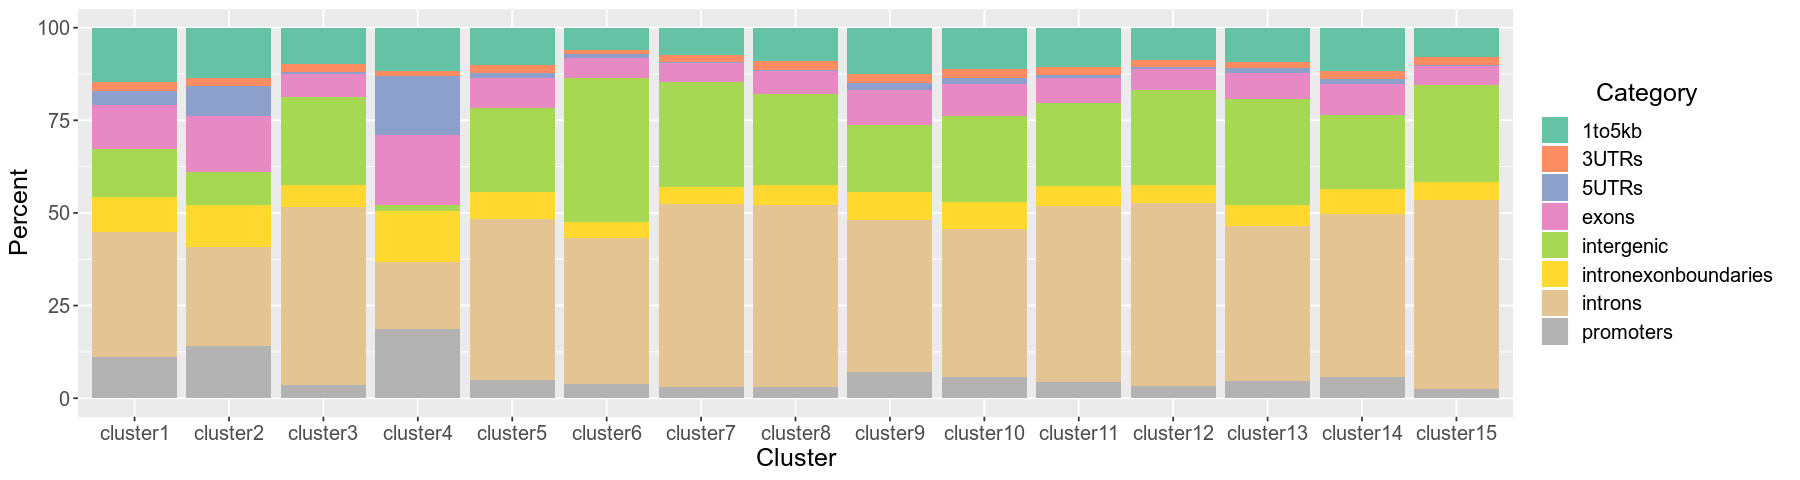

In [172]:
options(repr.plot.width = 15, repr.plot.height = 4)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## CpG

In [173]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [174]:
annotated = list()

for (i in seq(1,NCLUST)) {
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [175]:
annotated[[1]]

annot.type,n
<chr>,<int>
hg38_cpg_inter,22688
hg38_cpg_islands,4410
hg38_cpg_shelves,2086
hg38_cpg_shores,9117


In [ ]:
# specific to type of annotation, this one for CpG level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = "cluster1"

for (i in seq(2,NCLUST)) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("cluster%d", i)] = cur_df[rownames(annotated_df), "n"]
}

In [177]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15
inter,59.236051,41.571924,94.2614978,8.954221,87.475071,91.2511623,97.9194101,95.64095950,77.710754,84.190370,91.5592692,96.23097479,88.333043,89.1867509,97.8595890
islands,11.514060,24.476424,0.3501459,47.173282,2.592638,3.5390516,0.2600737,0.05527101,4.691689,3.023896,0.1557853,0.09759498,3.547150,0.4833097,0.1317176
shelves,5.446333,4.412997,2.6705572,1.227623,3.161394,0.9239888,0.8822755,2.58299864,4.768643,4.543823,4.2876363,2.06808412,2.248562,5.2519655,1.1887513
shores,23.803556,29.538655,2.7177991,42.644874,6.770897,4.2857973,0.9382407,1.72077085,12.828915,8.241912,3.9973092,1.60334611,5.871245,5.0779740,0.8199420


In [178]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,inter,cluster1,59.236051
2,islands,cluster1,11.514060
3,shelves,cluster1,5.446333
4,shores,cluster1,23.803556
5,inter,cluster2,41.571924
6,islands,cluster2,24.476424


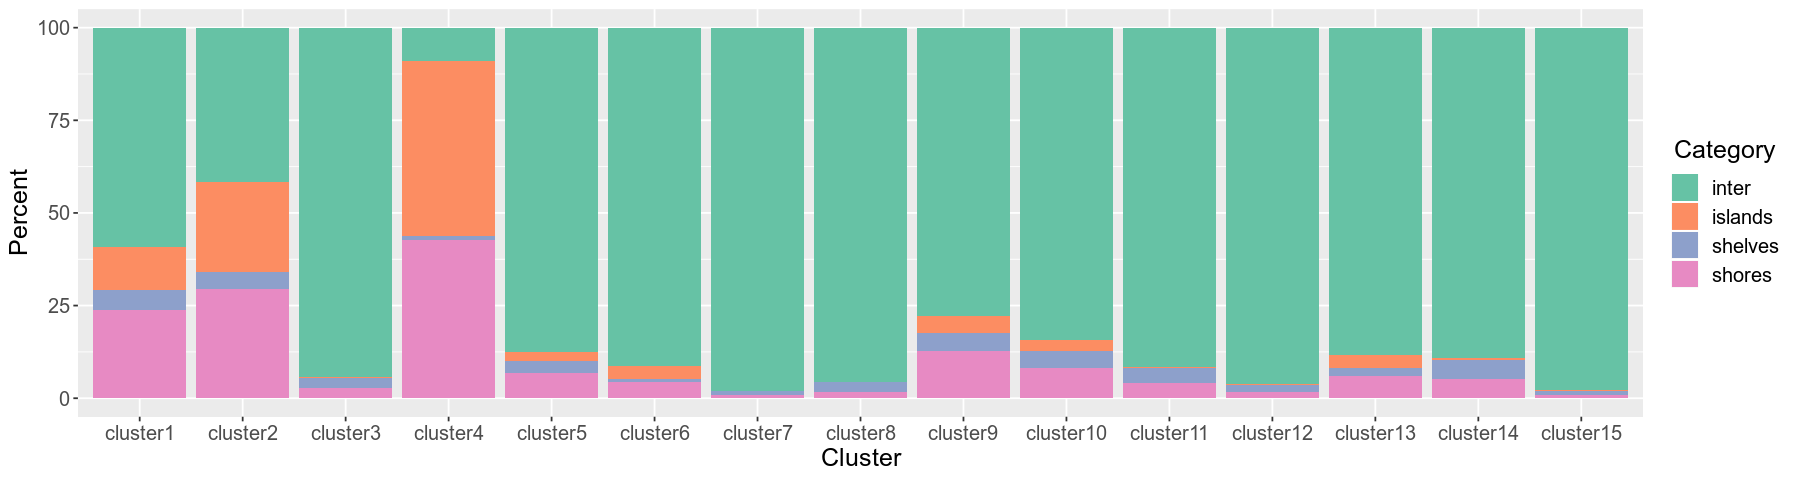

In [181]:
options(repr.plot.width = 15, repr.plot.height = 4)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## Distance From Nearest Gene

In [ ]:
library(EnsDb.Hsapiens.v86)

In [27]:
edb <- EnsDb.Hsapiens.v86

In [28]:
genes.hg38 = genes(edb, column = "gene_name", filter = GeneBiotypeFilter("protein_coding"))

In [29]:
tss.hg38 = resize(genes.hg38, width=1, fix='start')
head(tss.hg38, 2)

GRanges object with 2 ranges and 3 metadata columns:
                  seqnames    ranges strand |   gene_name         gene_id
                     <Rle> <IRanges>  <Rle> | <character>     <character>
  ENSG00000186092        1     69091      + |       OR4F5 ENSG00000186092
  ENSG00000279928        1    182393      + |  FO538757.2 ENSG00000279928
                    gene_biotype
                     <character>
  ENSG00000186092 protein_coding
  ENSG00000279928 protein_coding
  -------
  seqinfo: 287 sequences from GRCh38 genome

In [121]:
plots = list()

for (i in seq(1,NCLUST)) {
    # take mid of peaks
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks$chr = sub("chr", "", peaks$chr)
    peaks_mid = as.integer((peaks$start+peaks$end)/2)
    peaks$start = peaks_mid
    peaks$end = peaks_mid+1
    peaks = makeGRangesFromDataFrame(peaks)
    
    dists = data.frame(distanceToNearest(peaks, tss.hg38, ignore.strand=TRUE))$distance
    
    plots[[i]] <- ggplot(data.frame(d=dists+1), aes(x=d)) + 
        geom_histogram(bins=50, col='black', alpha=0.5, fill='red') +
        scale_x_log10() +
        coord_cartesian(xlim=c(1,1e7)) +
        ggtitle(sprintf("Cluster %d", i)) +  
        xlab("Distance from Nearest TSS") + ylab("Count") + 
        geom_vline(xintercept = 1000, linetype="dashed") +
        theme(plot.title = element_text(hjust = 0.5))
}

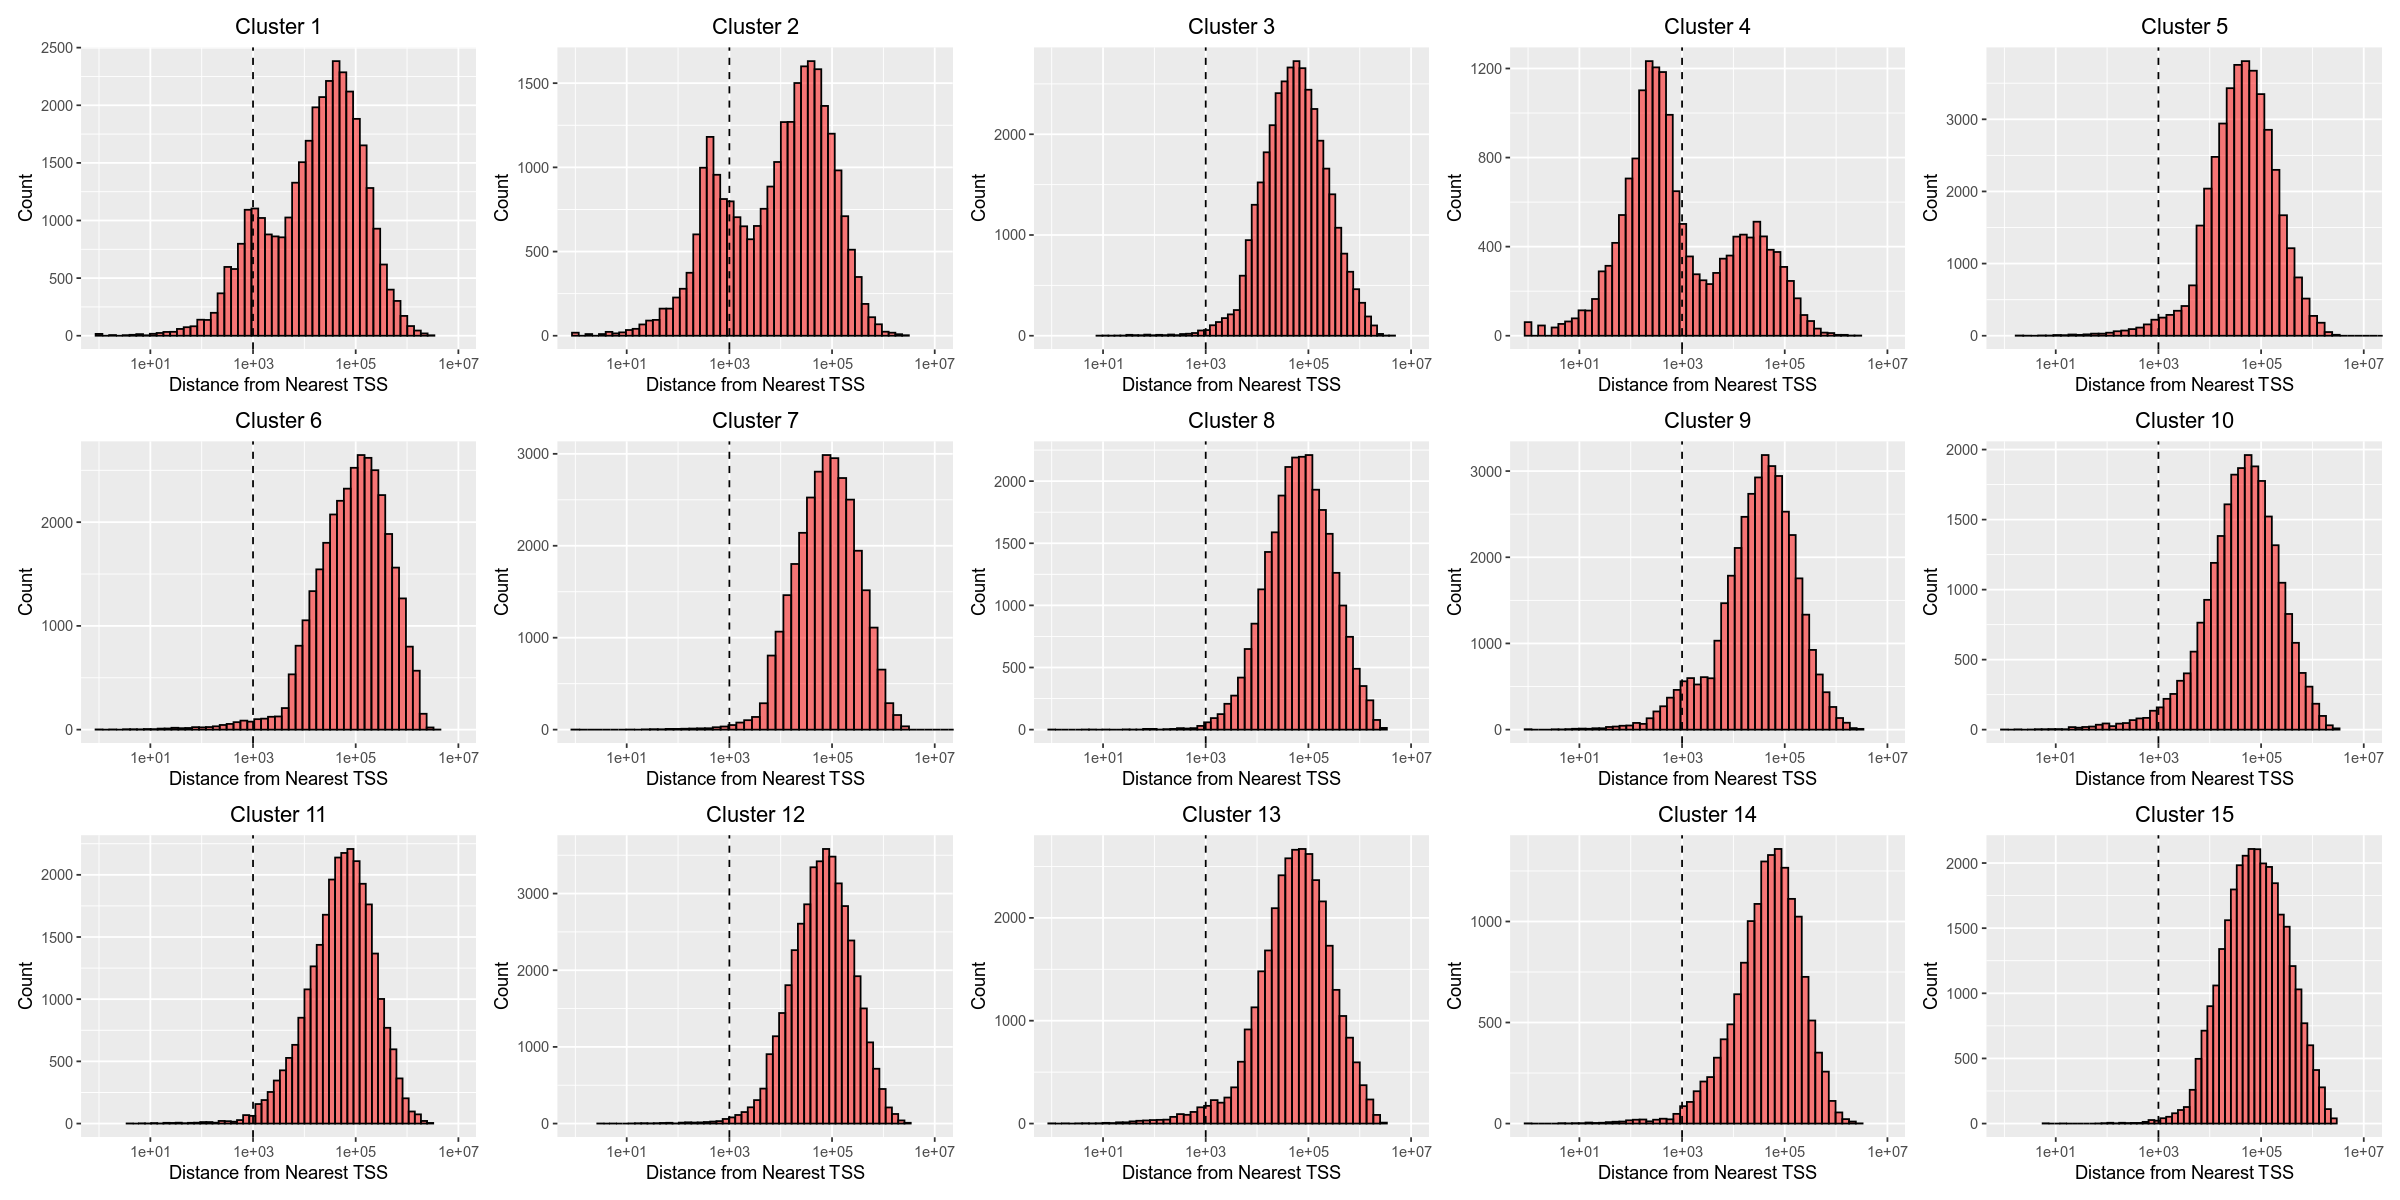

In [122]:
options(repr.plot.width = 20, repr.plot.height = 10)
wrap_plots(plots, ncol = 5)